#Download the dataset and Import Libraries

In [1]:
!wget 'http://snap.stanford.edu/deepnetbio-ismb/ipynb/yeast.edgelist'

--2020-09-27 06:33:25--  http://snap.stanford.edu/deepnetbio-ismb/ipynb/yeast.edgelist
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11758544 (11M) [text/plain]
Saving to: ‘yeast.edgelist’

yeast.edgelist      100%[===================>]  11.21M  4.15MB/s    in 2.7s    

2020-09-27 06:33:28 (4.15 MB/s) - ‘yeast.edgelist’ saved [11758544/11758544]



In [10]:
import matplotlib.pyplot as plt 
import networkx as nx

from operator import itemgetter
import seaborn as sns

from google.colab import files
import nxviz as nv
from nxviz import CircosPlot

In [ ]:
!pip install nxviz

#Create Graph

In [7]:
G = nx.read_edgelist('yeast.edgelist')
adj = nx.adjacency_matrix(G)

#Descriptive Stats

In [11]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 6526
Number of edges: 532180
Average degree: 163.0953


In [12]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.024995449971408207


#Degree Centrality

In [16]:
deg_centrality = nx.degree_centrality(G) 

In [5]:
print(deg_centrality) #degree centrality of every node in the graph

{'YLR418C': 0.15157088122605364, 'YOL145C': 0.029425287356321838, 'YOR123C': 0.07279693486590039, 'YBR279W': 0.023448275862068966, 'YML069W': 0.1068199233716475, 'YGL244W': 0.11003831417624521, 'YGL207W': 0.048122605363984675, 'YER164W': 0.0735632183908046, 'YIL035C': 0.05624521072796935, 'YOR061W': 0.06007662835249042, 'YGL019W': 0.07877394636015325, 'YOR039W': 0.07770114942528736, 'YDL209C': 0.01685823754789272, 'YDR364C': 0.025134099616858238, 'YMR213W': 0.04689655172413793, 'YLR117C': 0.043065134099616854, 'YGR278W': 0.02467432950191571, 'YGL128C': 0.00475095785440613, 'YBR065C': 0.027126436781609194, 'YJR050W': 0.029425287356321838, 'YPL213W': 0.10574712643678161, 'YLL036C': 0.07938697318007662, 'YGL120C': 0.07019157088122605, 'YAL032C': 0.0367816091954023, 'YPL151C': 0.0346360153256705, 'YHR165C': 0.0357088122605364, 'YER029C': 0.01808429118773946, 'YGR074W': 0.0582375478927203, 'YLR147C': 0.010421455938697317, 'YPR101W': 0.04582375478927203, 'YKL173W': 0.06314176245210727, 'YDR4

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

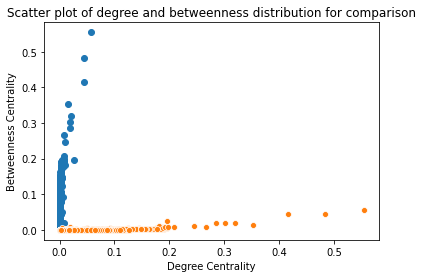

In [28]:
sns.scatterplot(list(deg_centrality.values()), list(bet_centrality.values()))
plt.xlabel("Degree Centrality")
plt.ylabel("Betweenness Centrality")
plt.title("Scatter plot of degree and betweenness distribution for comparison")
plt.plot()
plt.savefig('degree_betweenness_centrality.png')
files.download('degree_betweenness_centrality.png')

In [38]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')



sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('YDL160C', 3619)
('YAL021C', 3155)
('YGL122C', 2712)
('YFL039C', 2300)
('YNL209W', 2085)


In [44]:
def degree_centrality_dist(graph, plot=False):

    dc = nx.degree_centrality(graph)
    centrality_values = []
    for key, value in reversed(sorted(dc.items(), key=lambda item: (item[1], item[0]))):
        print("%s: %s" % (key, value))
        centrality_values += [value]
    if plot:
        sns.distplot(centrality_values)
        plt.xlabel("Degree Centrality")
        plt.ylabel("Frequency")
        plt.title("Degree Centrality Distribution")
        plt.plot()
        plt.savefig('degree_centrality_distribution.png')
        files.download('degree_centrality_distribution.png')

    return dc

Streaming output truncated to the last 5000 lines.
YKR042W: 0.034482758620689655
YKL119C: 0.034482758620689655
YKL002W: 0.034482758620689655
YJL177W: 0.034482758620689655
YHR158C: 0.034482758620689655
YGR091W: 0.034482758620689655
YEL043W: 0.034482758620689655
YDR201W: 0.034482758620689655
YDR072C: 0.034482758620689655
YDL134C: 0.034482758620689655
YBR288C: 0.034482758620689655
YBL061C: 0.034482758620689655
YPR094W: 0.03432950191570881
YOR368W: 0.03432950191570881
YNL186W: 0.03432950191570881
YMR308C: 0.03432950191570881
YEL037C: 0.03432950191570881
YDR318W: 0.03432950191570881
YPR180W: 0.03417624521072797
YPR055W: 0.03417624521072797
YPL148C: 0.03417624521072797
YNL088W: 0.03417624521072797
YMR298W: 0.03417624521072797
YML124C: 0.03417624521072797
YML051W: 0.03417624521072797
YJR077C: 0.03417624521072797
YLR018C: 0.03402298850574712
YIL065C: 0.03402298850574712
YGR163W: 0.03402298850574712
YGL203C: 0.03402298850574712
YGL014W: 0.03402298850574712
YER006W: 0.03402298850574712
YDR508C: 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'YLR418C': 0.15157088122605364,
 'YOL145C': 0.029425287356321838,
 'YOR123C': 0.07279693486590039,
 'YBR279W': 0.023448275862068966,
 'YML069W': 0.1068199233716475,
 'YGL244W': 0.11003831417624521,
 'YGL207W': 0.048122605363984675,
 'YER164W': 0.0735632183908046,
 'YIL035C': 0.05624521072796935,
 'YOR061W': 0.06007662835249042,
 'YGL019W': 0.07877394636015325,
 'YOR039W': 0.07770114942528736,
 'YDL209C': 0.01685823754789272,
 'YDR364C': 0.025134099616858238,
 'YMR213W': 0.04689655172413793,
 'YLR117C': 0.043065134099616854,
 'YGR278W': 0.02467432950191571,
 'YGL128C': 0.00475095785440613,
 'YBR065C': 0.027126436781609194,
 'YJR050W': 0.029425287356321838,
 'YPL213W': 0.10574712643678161,
 'YLL036C': 0.07938697318007662,
 'YGL120C': 0.07019157088122605,
 'YAL032C': 0.0367816091954023,
 'YPL151C': 0.0346360153256705,
 'YHR165C': 0.0357088122605364,
 'YER029C': 0.01808429118773946,
 'YGR074W': 0.0582375478927203,
 'YLR147C': 0.010421455938697317,
 'YPR101W': 0.04582375478927203,
 'YKL173

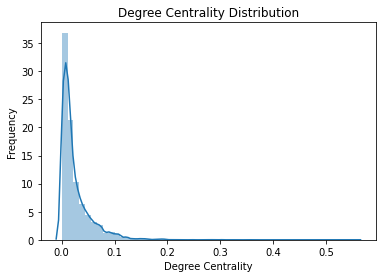

In [45]:
degree_centrality_dist(G, plot=True)

#Betweenness Centrality

In [13]:
bet_centrality = nx.betweenness_centrality(G)

print(bet_centrality)

{'YLR418C': 0.001656134015118391, 'YOL145C': 0.00018016543449021142, 'YOR123C': 0.00021410275217734952, 'YBR279W': 1.5700444332314417e-05, 'YML069W': 0.0007030345889510909, 'YGL244W': 0.0008939235029980321, 'YGL207W': 0.00014626707266640845, 'YER164W': 0.0002248375546211821, 'YIL035C': 0.0003288826552094151, 'YOR061W': 0.0003002492445346543, 'YGL019W': 0.00039843517557800194, 'YOR039W': 0.0003222345739206253, 'YDL209C': 2.7112320794436734e-05, 'YDR364C': 2.9598726136094247e-05, 'YMR213W': 0.00012871384457145119, 'YLR117C': 9.434133021299814e-05, 'YGR278W': 2.8861850027781595e-05, 'YGL128C': 6.815442979657837e-07, 'YBR065C': 6.839479321217443e-05, 'YJR050W': 9.083507356679867e-05, 'YPL213W': 0.0009952065614365652, 'YLL036C': 0.0007448660840984031, 'YGL120C': 0.0003337657583516497, 'YAL032C': 0.0004894714858849539, 'YPL151C': 6.810728891992846e-05, 'YHR165C': 0.0001696302414062082, 'YER029C': 1.7027711457528173e-05, 'YGR074W': 0.0005303782511404497, 'YLR147C': 5.814953065770271e-06, 'YPR

In [39]:
betweenness_dict = bet_centrality # Run betweenness centrality
nx.set_node_attributes(G, betweenness_dict, 'betweenness')

sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 5 nodes by betweenness centrality:")
for b in sorted_betweenness[:5]:
    print(b)

Top 5 nodes by betweenness centrality:
('YDL160C', 0.05698863452070676)
('YGL122C', 0.04484145348310374)
('YAL021C', 0.04412869732613591)
('YPR042C', 0.025649927497300128)
('YNL209W', 0.020345554314768706)


In [36]:
top_betweenness = sorted_betweenness[:5]

for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] 
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: YDL160C | Betweenness Centrality: 0.05698863452070676 | Degree: 3619
Name: YGL122C | Betweenness Centrality: 0.04484145348310374 | Degree: 2712
Name: YAL021C | Betweenness Centrality: 0.04412869732613591 | Degree: 3155
Name: YPR042C | Betweenness Centrality: 0.025649927497300128 | Degree: 1280
Name: YNL209W | Betweenness Centrality: 0.020345554314768706 | Degree: 2085


In [7]:
def betweenness_centrality_dist(graph, plot=False):

    bc = nx.betweenness_centrality(graph)
    centrality_values = []
    for key, value in reversed(sorted(bc.items(), key=lambda item: (item[1], item[0]))):
        print("%s: %s" % (key, value))
        centrality_values += [value]
    if plot:
        sns.distplot(centrality_values)
        plt.xlabel("Betweenness Centrality")
        plt.ylabel("Frequency")
        plt.title("Betweenness Centrality Distribution")
        plt.plot()
        plt.savefig('betweenness_centrality_distribution.png')
        files.download('betweenness_centrality_distribution.png')

    return bc

Streaming output truncated to the last 5000 lines.
YAL055W: 0.00011228531700371039
YDR051C: 0.00011218849461755968
YGR103W: 0.00011197239028379402
YDR082W: 0.00011193537552369307
YKR086W: 0.00011158214234049642
YDR189W: 0.00011128270305792763
YHR104W: 0.00011119253103516449
YOL138C: 0.00011114492393274823
YGL133W: 0.00011106108839381709
YOR068C: 0.00011071138356383136
YML102W: 0.00011051648346720954
YPL147W: 0.00011041213995966063
YML062C: 0.00011031288573223307
YBR283C: 0.00011030745123546781
YOR005C: 0.00011022742346849336
YBR185C: 0.00011010206641288341
YJL062W: 0.00010980668080218264
YLR022C: 0.00010972101330793997
YIL144W: 0.00010971698767276572
YHR031C: 0.00010953648069624315
YDL083C: 0.00010939107997831725
YDR086C: 0.00010934252390625095
YMR016C: 0.00010919170974895246
YPL146C: 0.00010908203461062602
YJL080C: 0.00010893680815682499
YAR007C: 0.00010886489499010326
YBR159W: 0.00010853807463578887
YLR357W: 0.00010846622243438382
YHR008C: 0.00010824711731702631
YGR030C: 0.0001081522

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'YLR418C': 0.001656134015118391,
 'YOL145C': 0.00018016543449021142,
 'YOR123C': 0.00021410275217734952,
 'YBR279W': 1.5700444332314417e-05,
 'YML069W': 0.0007030345889510909,
 'YGL244W': 0.0008939235029980321,
 'YGL207W': 0.00014626707266640845,
 'YER164W': 0.0002248375546211821,
 'YIL035C': 0.0003288826552094151,
 'YOR061W': 0.0003002492445346543,
 'YGL019W': 0.00039843517557800194,
 'YOR039W': 0.0003222345739206253,
 'YDL209C': 2.7112320794436734e-05,
 'YDR364C': 2.9598726136094247e-05,
 'YMR213W': 0.00012871384457145119,
 'YLR117C': 9.434133021299814e-05,
 'YGR278W': 2.8861850027781595e-05,
 'YGL128C': 6.815442979657837e-07,
 'YBR065C': 6.839479321217443e-05,
 'YJR050W': 9.083507356679867e-05,
 'YPL213W': 0.0009952065614365652,
 'YLL036C': 0.0007448660840984031,
 'YGL120C': 0.0003337657583516497,
 'YAL032C': 0.0004894714858849539,
 'YPL151C': 6.810728891992846e-05,
 'YHR165C': 0.0001696302414062082,
 'YER029C': 1.7027711457528173e-05,
 'YGR074W': 0.0005303782511404497,
 'YLR147C':

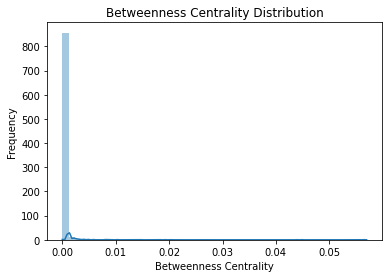

In [8]:
betweenness_centrality_dist(G, plot=True)